# Install all

In [1]:
#!pip install seaborn
#!pip install pandas_datareader
#!  pip install keras


# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math
import pandas_datareader as web


In [3]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
url = 'https://raw.githubusercontent.com/Aabishkar2/nepse-data/refs/heads/main/data/company-wise/ADBL.csv'
data = pd.read_csv(url)
selected_data = data[['published_date', 'close']]
selected_data.head()



,published_date,close
0,2010-09-16,120.0
1,2010-09-19,118.0
2,2010-09-20,118.0
3,2010-09-21,116.0
4,2010-09-23,120.0


In [5]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 3222 number of days in the dataset.


Plotting the graph


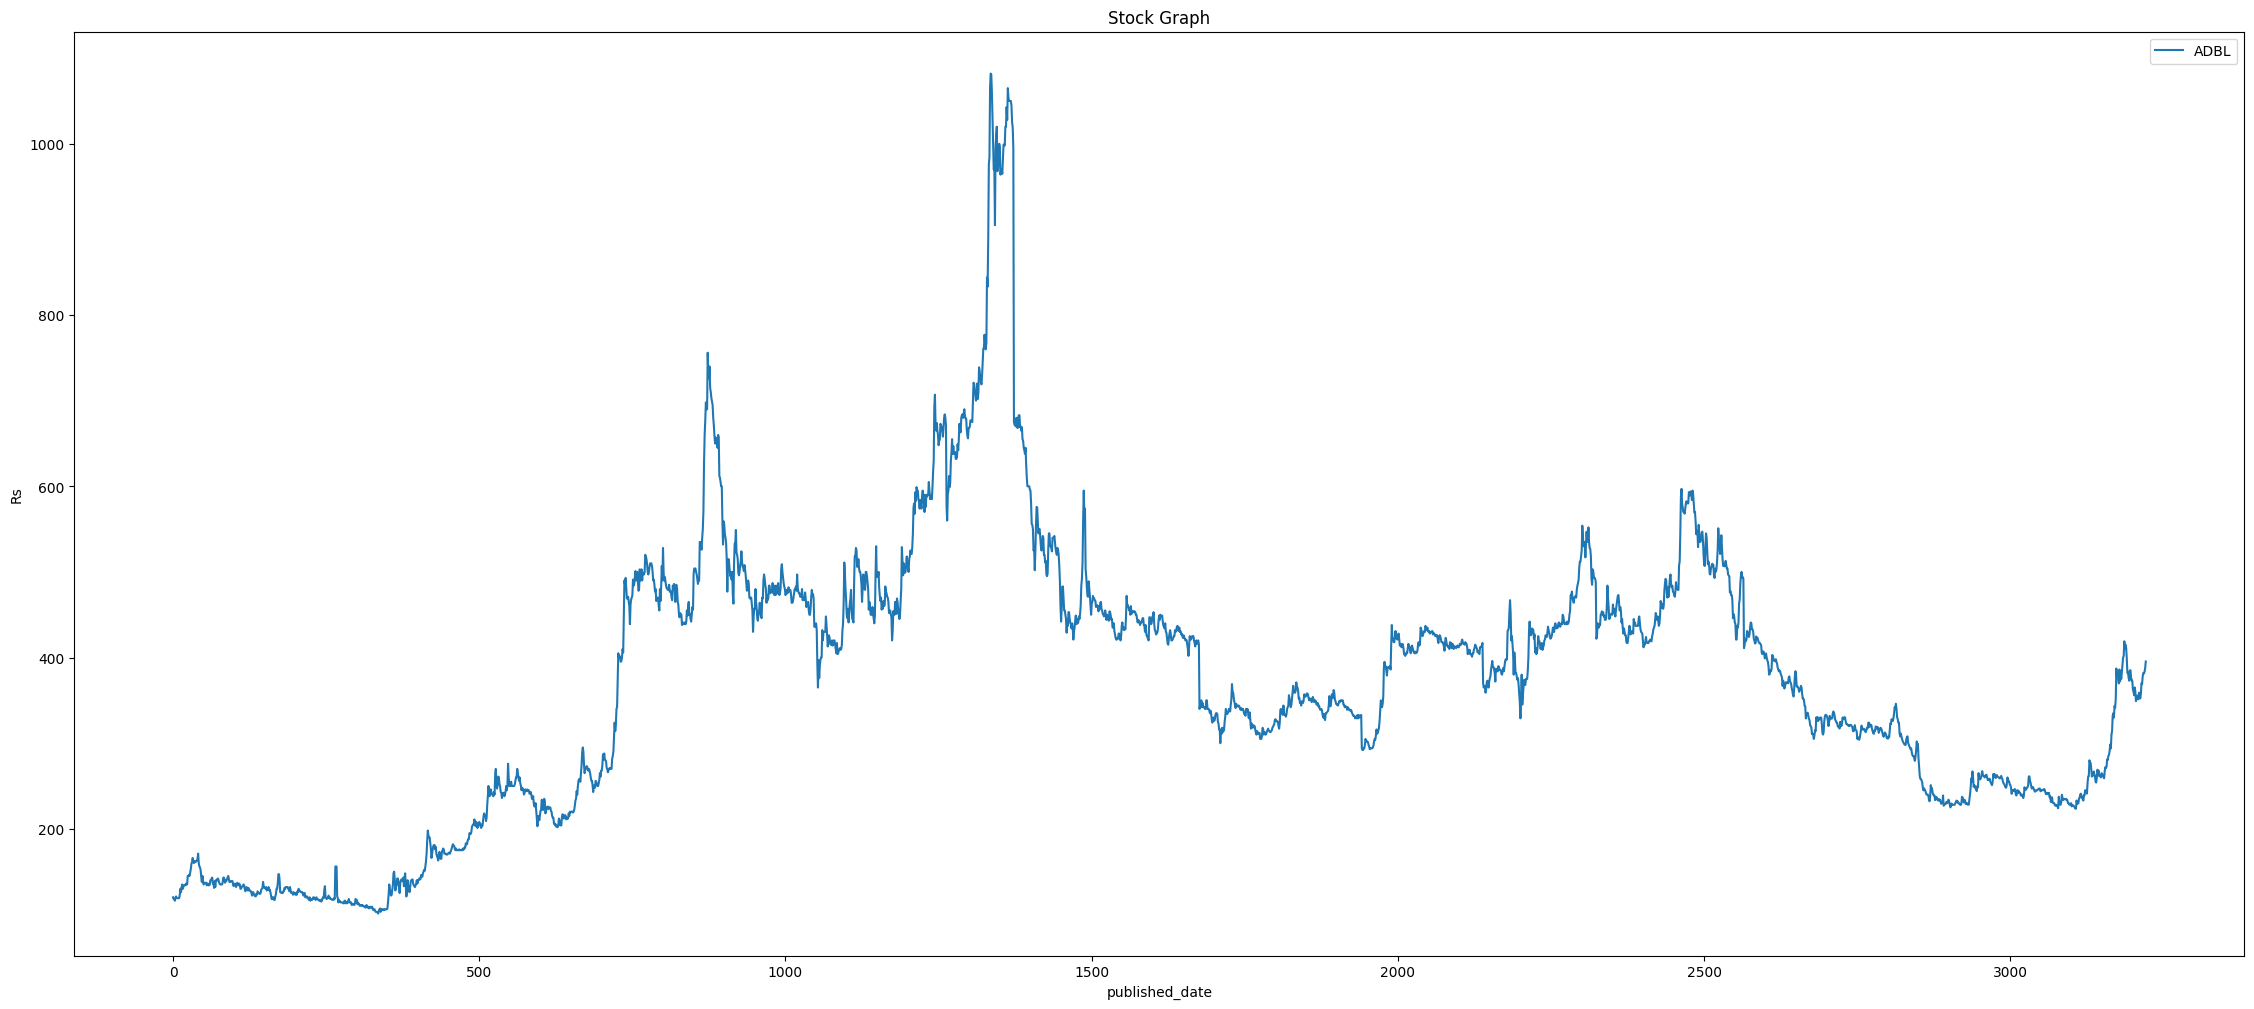

In [6]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index, data['close'], label='ADBL')
plt.xlabel('published_date')
plt.ylabel('Rs')
plt.title('Stock Graph')
plt.legend()
plt.show()

# Logic For Technical  Analysis

Moving averages (7 and 21 dayss)
MACD
Bolinger Bands
EMA
Momentum

In [7]:


def technical_analysis(dataset):
    # Moving Average of 7 and 21 days
    dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()

    # Create MACD
    dataset.loc[:, '26ema'] = dataset['close'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['close'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = dataset['12ema'] - dataset['26ema']

    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['close'].rolling(window=21).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd'] * 2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd'] * 2)

    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['close'] - 1
    dataset.loc[:, 'log_momentum'] = np.log(dataset['momentum'])

    return dataset


In [8]:
df=technical_analysis(selected_data)

C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma7'] = dataset['close'].rolling(window=7).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.loc[:, 'ma21'] = dataset['close'].rolling(window=21).mean()
C:\Users\L E G I O N\AppData\Local\Temp\ipykernel_27192\880002497.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [9]:
df = df.dropna()
df.head()

,published_date,close,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
20,2010-10-24,134.0,133.142857,124.714286,127.495172,130.136465,2.641293,6.834785,138.383856,111.044716,133.939830,133.0,4.890349
21,2010-10-25,136.0,133.714286,125.476190,128.267159,131.062005,2.794846,7.166722,139.809635,111.142746,135.313277,135.0,4.905275
22,2010-10-26,135.0,133.714286,126.285714,128.868266,131.681128,2.812862,7.239771,140.765257,111.806172,135.104426,134.0,4.897840
23,2010-10-27,135.0,134.428571,127.095238,129.407506,132.201160,2.793654,7.217373,141.529985,112.660492,135.034809,134.0,4.897840
24,2010-10-28,145.0,136.142857,128.476190,130.759993,134.200918,3.440924,7.743507,143.963205,112.989176,141.678270,144.0,4.969813


# Plotting these analysis